In [9]:
import pymc3 as pm

from bayesumis.umis_math_model import UmisMathModel
from bayesumis.umis_diagram import UmisDiagram
from stafdb.staf_factory import StafFactory
from testhelper.posterior_plotters import display_parameters

In [10]:
def make_stafids_from_ranges(ranges):
    stafids = []
    for (l, u) in ranges:
        str_range = [str(x) for x in range(l, u+1)]
        stafids = stafids + str_range
    return stafids

In [11]:
staf_factory = StafFactory('csvs_zinc_cycle_graedal_2005')

# stafs [1-2] are external inflows
# stafs [3-8, 11-16, 18-22] are internal stafs
# stafs [9-10, 17] are external outflows
external_inflow_stafids = make_stafids_from_ranges([(1,2)])
internal_stafs_stafids = make_stafids_from_ranges([(3,8), (11,16), (18,22)])
external_outflow_stafids = make_stafids_from_ranges([(9,10), (17,17)])


In [12]:
external_inflows = staf_factory.build_stafs(external_inflow_stafids)
internal_stafs = staf_factory.build_stafs(internal_stafs_stafids)
external_outflows = staf_factory.build_stafs(external_outflow_stafids)

ref_material = staf_factory.build_material('1')
ref_timeframe = staf_factory.build_timeframe('1')

In [13]:
umis_diagram = UmisDiagram(
    external_inflows,
    internal_stafs,
    external_outflows
)

In [14]:
res_inflows = umis_diagram.get_external_inflows()
res_dict = umis_diagram.get_process_stafs_dict()
res_outflows = umis_diagram.get_external_outflows()

In [15]:
print("Inflows")
for x in res_inflows:
    print(x)
    
print()
print()

print("Internal Stafs")
for key, values in res_dict.items():
    print(key)
    for val in values:
        print(val)
    print()
    
print()
print()

print("Outflows")
for x in res_outflows:
    print(x)

Inflows
Staf: Concentrate, ID: 1
Staf: Imported Refined Zinc, ID: 2


Internal Stafs
Process: Production: Mill, Smelter, Refinery – Transformation, STAFDB ID: 2
Staf: Distributed Production, ID: 3

Process: Production: Mill, Smelter, Refinery – Distribution, STAFDB ID: 3
Staf: Production Refined Zinc, ID: 5
Staf: Slag, ID: 6
Staf: Production Mass Balance, ID: 4

Process: Production: Mass balance, STAFDB ID: 5

Process: Fabrication and Manufacturing – Transformation, STAFDB ID: 6
Staf: Distributed Fabrication and Manufacturing, ID: 8

Process: Environment, STAFDB ID: 14
Staf: Dissipation to Environment, ID: 22

Process: Production: Mill, Smelter, Refinery – Stock, STAFDB ID: 4
Staf: Production Stock, ID: 7

Process: Fabrication and Manufacturing – Distribution, STAFDB ID: 7
Staf: Products, ID: 11
Staf: Fabrication and Manufacturing Discards, ID: 12

Process: Use – Transformation, STAFDB ID: 8
Staf: Distributed Use, ID: 13
Staf: Use stock, ID: 14

Process: Waste Management – Tranformatio

In [16]:
math_model = UmisMathModel(
    res_inflows,
    res_dict,
    res_outflows,
    ref_material,
    ref_timeframe)

/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


Process with id: 5_2, has no outflows
Process with id: 13_2, has no outflows


In [17]:
sample_size = 3000

with math_model.pm_model:
    trace = pm.sample(sample_size, init='advi')


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
  0%|          | 0/200000 [00:00<?, ?it/s]/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Average Loss = 57.573:  14%|█▍        | 27571/200000 [01:04<06:33

In [18]:
map_estimate = pm.find_MAP(model=math_model.pm_model)

/home/tom/.local/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-mfa-paper/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; 

In [19]:
"""
Functions to plot specific stock values, flow values and transfer
coefficients
"""

import math
import matplotlib.pyplot as plt
import seaborn as sns


def get_staf_samples(staf, varname, trace, math_model):
    row, col = math_model.get_staf_inds(staf)
    staf_samples = trace[varname][:, row, col]
    return staf_samples


def get_input_samples(staf, varname, trace, math_model):
    row, col = math_model.get_input_inds(staf)
    staf_samples = trace[varname][:, row, col]
    return staf_samples


def make_samples_dict(
        external_inflows,
        internal_stafs,
        external_outflows,
        trace,
        math_model):
    samples_dict = {}

    samples_dict['External Inflows'] = {}
    for flow in external_inflows:
        input_name = "Input Flow: " + flow.name
        samples = get_input_samples(
            flow, math_model.INPUT_VAR_NAME, trace, math_model)
        samples_dict['External Inflows'][input_name] = samples
        
    samples_dict['Internal Stafs'] = {}
    for staf in internal_stafs:
        staf_name = "Internal Staf: " + staf.name
        if staf.origin_process.process_type == 'Storage':
            staf_samples = get_input_samples(
                staf, math_model.INPUT_VAR_NAME, trace, math_model)

        else:
            staf_samples = get_staf_samples(
                staf, math_model.STAF_VAR_NAME, trace, math_model)

            tc_name = "TC: " + staf.name
            tc_samples = get_staf_samples(
                staf, math_model.TC_VAR_NAME, trace, math_model)

            samples_dict['Internal Stafs'][tc_name] = tc_samples

        samples_dict['Internal Stafs'][staf_name] = staf_samples

    samples_dict['External Outflows'] = {}
    for flow in external_outflows:
        staf_name = "Output Flow: " + flow.name
        tc_name = "TC: " + flow.name

        staf_samples = get_staf_samples(
            flow, math_model.STAF_VAR_NAME, trace, math_model)

        tc_samples = get_staf_samples(
            flow, math_model.TC_VAR_NAME, trace, math_model)

        samples_dict['External Outflows'][staf_name] = staf_samples
        samples_dict['External Outflows'][tc_name] = tc_samples
        
    return samples_dict


def print_estimated_values(param_type, param_dict):
    print("Expected values of: " + param_type + "\n")
    for name, estimated_value in param_dict.items():
        print(name + ": " + str(estimated_value))
    print()


def get_staf_estimates(staf, varname, map_estimate, math_model):
    row, col = math_model.get_staf_inds(staf)
    estimates = map_estimate[varname][row, col]
    return estimates


def get_input_estimates(staf, varname, map_estimate, math_model):
    row, col = math_model.get_input_inds(staf)
    estimates = map_estimate[varname][row, col]
    return estimates


def make_estimates_dict(
        external_inflows,
        internal_stafs,
        external_outflows,
        map_estimate,
        math_model):
    estimates_dict = {}
    
    estimates_dict['External Inflows'] = {}
    for flow in external_inflows:
        flow_varname = "Input Flow: " + flow.name
        estimates = get_input_estimates(
            flow, math_model.INPUT_VAR_NAME, map_estimate, math_model)
        estimates_dict['External Inflows'][flow_varname] = estimates
        
    estimates_dict['Internal Stafs'] = {}
    for staf in internal_stafs:
        staf_name = "Internal Staf: " + flow.name
        if staf.origin_process.process_type == 'Storage':

            staf_estimates = get_input_estimates(
                    staf, math_model.INPUT_VAR_NAME, map_estimate, math_model)

        else:
            staf_estimates = get_staf_estimates(
                staf, math_model.STAF_VAR_NAME, map_estimate, math_model)

            tc_name = "TC: " + flow.name
        
            tc_estimates = get_staf_estimates(
                staf, math_model.TC_VAR_NAME, map_estimate, math_model)

            estimates_dict['Internal Stafs'][tc_name] = tc_estimates

        estimates_dict['Internal Stafs'][staf_name] = staf_estimates

    estimates_dict['External Outflows'] = {}
    for flow in external_outflows:
        staf_name = "Output Flow: " + flow.name
        tc_name = "TC: " + flow.name
        staf_estimates = get_staf_estimates(
            flow, math_model.STAF_VAR_NAME, map_estimate, math_model)

        tc_estimates = get_staf_estimates(
            flow, math_model.TC_VAR_NAME, map_estimate, math_model)

        estimates_dict['External Outflows'][staf_name] = staf_estimates
        estimates_dict['External Outflows'][tc_name] = tc_estimates
            
    return estimates_dict


def plot_posteriors(samples_dict):
    for param_type, param_dict in samples_dict.items():
        num_params = len(param_dict.keys())
        plot_width = 1
        plot_height = math.ceil(num_params/plot_width)
        fig = plt.figure(figsize=(plot_width*4, plot_height*4))
        i = 1
        for name, samples in param_dict.items():
            ax = fig.add_subplot(plot_height, plot_width, i, title=name)
            try:
                sns.kdeplot(samples, axes=ax)
            except Exception:
                ax.hist(samples)
            i = i+1
        fig.suptitle(param_type, y=1.08)
        plt.tight_layout(pad=0.4)


def display_estimates(estimates_dict):
    for param_type, param_dict in estimates_dict.items():
        print("Estimates of: " + param_type + "\n")
        for name, estimate in param_dict.items():
            print(name + ": " + str(estimate))
        print()
        print()


def display_parameters(
        external_inflows,
        internal_flows,
        external_outflows,
        trace,
        map_estimate,
        math_model):
    samples_dict = make_samples_dict(
        external_inflows,
        internal_flows,
        external_outflows,
        trace,
        math_model)

    estimates_dict = make_estimates_dict(
        external_inflows,
        internal_flows,
        external_outflows,
        map_estimate,
        math_model)

    plot_posteriors(samples_dict)
    display_estimates(estimates_dict)



Estimates of: External Inflows

Input Flow: Concentrate: 120.01743526669367
Input Flow: Imported Refined Zinc: 110.56735350671794


Estimates of: Internal Stafs

TC: Imported Refined Zinc: 1.0
Internal Staf: Imported Refined Zinc: 73.0008852596246


Estimates of: External Outflows

Output Flow: Semis: 18.983244086579525
TC: Semis: 0.0780699931304327
Output Flow: Finished Products: 3.9992719623397015
TC: Finished Products: 0.01644730127277472
Output Flow: Zinc Scrap: 22.999936239771664
TC: Zinc Scrap: 0.1296917279421601




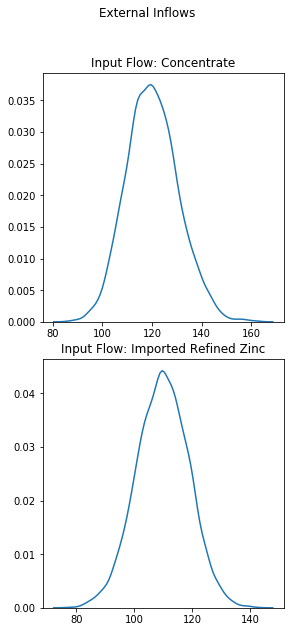

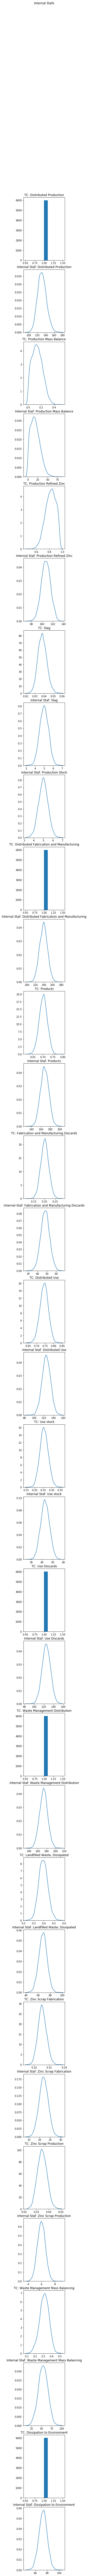

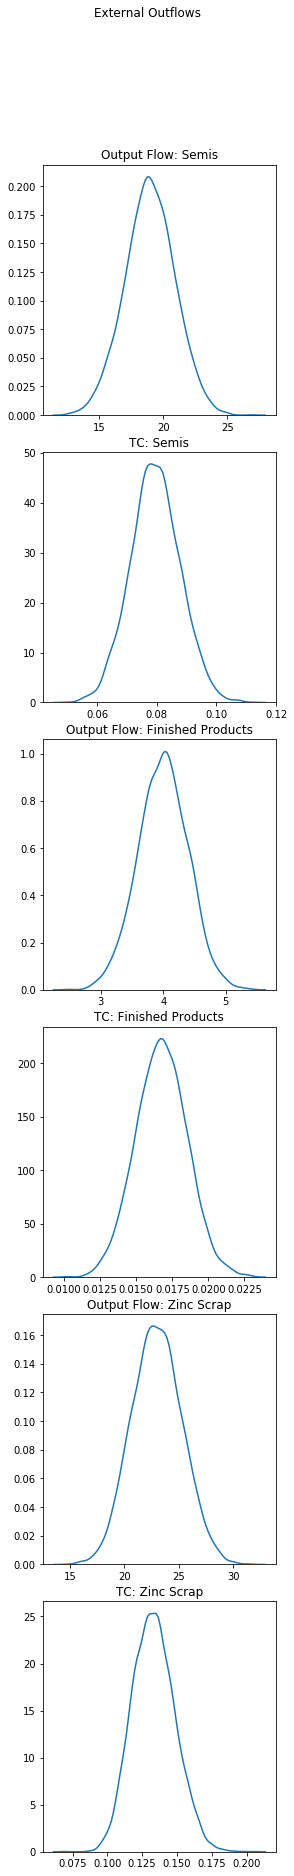

In [20]:
display_parameters(external_inflows, internal_stafs, external_outflows, trace, map_estimate, math_model)